# Libraries

In [1]:
import annotations_validation
import EDF_wrapper
import annotations_extraction
import filters
import pyedflib
import plotly.express as px
from pathlib import Path
import os
import pandas as pd
import numpy as np
import re
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters

In [2]:
directory = Path("data/edf/")
files = EDF_wrapper.read_files_from_dir(directory, load_files=True)
files

[{'filepath': 'data/edf/1-1-Bewegung_edited.bdf',
  'signals': array([[-2.65347050e+00, -4.09816558e+00, -4.09922416e+00, ...,
           1.10268599e-05,  1.10268599e-05,  1.10268599e-05],
         [-1.54233793e+00, -1.44602933e+00, -1.44344905e+00, ...,
           1.10268599e-05,  1.10268599e-05,  1.10268599e-05],
         [-3.29887007e+00,  4.98973220e+00,  4.99647129e+00, ...,
           7.58485959e-06,  7.58485959e-06,  7.58485959e-06],
         [-4.99413858e+00, -5.02268751e-02, -4.44226541e-02, ...,
           6.99207944e-06,  6.99207944e-06,  6.99207944e-06],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
  'signal_headers': [{'label': 'EMG 1',
    'dimension': 'mV',
    'sample_rate': 4000.0,
    'sample_frequency': 4000.0,
    'physical_max': 185.0,
    'physical_min': -185.0,
    'digital_max': 8388607,
    'digital_min': -8388608,
    'prefilter': '',
    'transducer': 'transkutan'},
   {'labe

/Users/matheusnoschang/.pyenv/versions/3.9.6/envs/AFE/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/matheusnoschang/.pyenv/versions/3.9.6/envs/AFE/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/matheusnoschang/.pyenv/versions/3.9.6/envs/AFE/lib/python3.9/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator

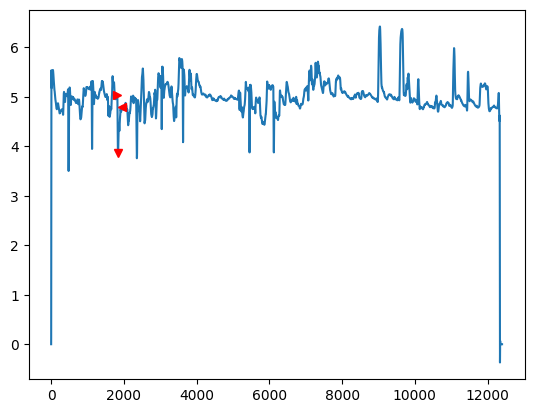

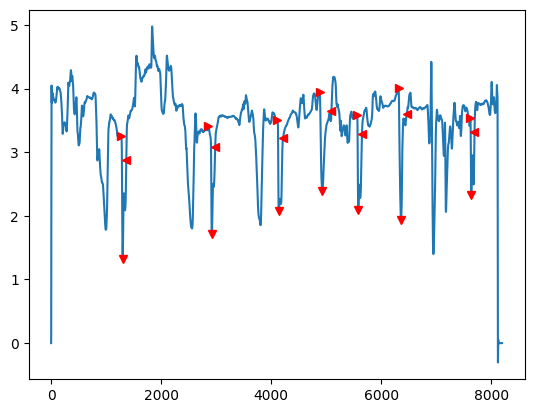

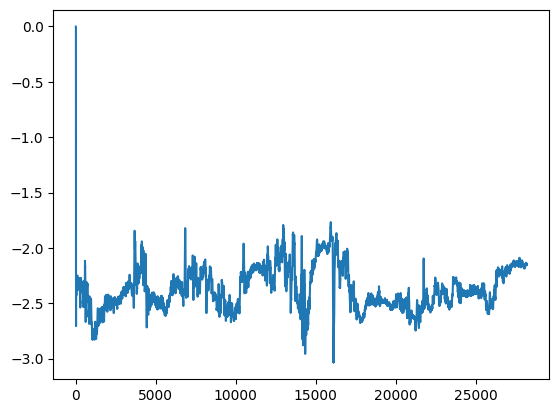

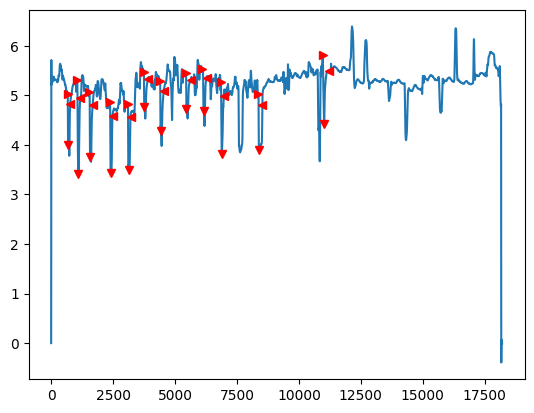

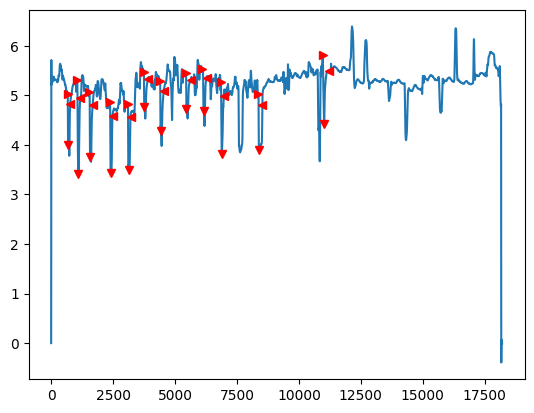

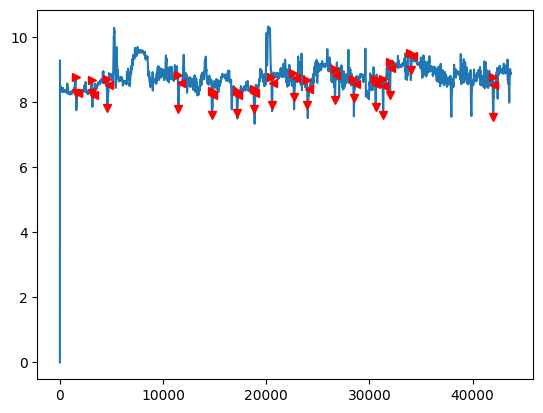

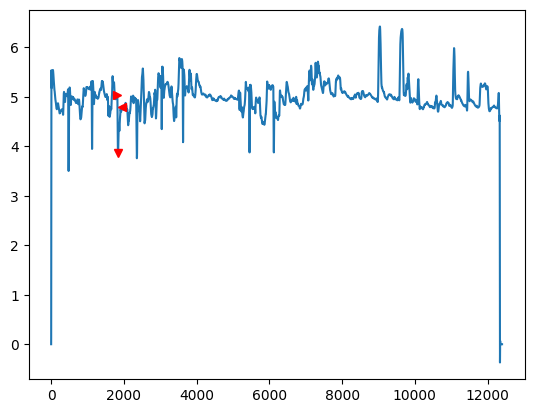

In [3]:
annotations_extraction.add_swallow_annotations_to_files(files)

In [4]:
directory = Path("data/annotated/")
annotated_files = EDF_wrapper.read_files_from_dir(directory, load_files=True)
len(annotated_files)

7

In [5]:
ann_file = annotated_files[0]
ann_file["header"]["annotations"] = list(map(lambda x: [x[0], x[1], x[2].lower()], ann_file["header"]["annotations"]))
ann_file["header"]["annotations"]

[[1.6465, -1.0, 'schlucken normal'],
 [4.027, -1.0, 'c_category1_start'],
 [4.646, -1.0, 'p_elevation_start'],
 [4.646, -1.0, 'p_swallow_start'],
 [4.768, -1.0, 'p_elevation_stop'],
 [4.768, -1.0, 'p_lowering_start'],
 [4.996, -1.0, 'p_lowering_stop'],
 [4.996, -1.0, 'p_swallow_stop'],
 [6.9507, -1.0, 'stop'],
 [8.94, -1.0, 'schlucken normal'],
 [11.11, -1.0, 'p_elevation_start'],
 [11.223, -1.0, 'p_elevation_stop'],
 [11.223, -1.0, 'p_lowering_start'],
 [11.413, -1.0, 'p_lowering_stop'],
 [11.913, -1.0, 'c_category1_stop'],
 [12.9407, -1.0, 'stop'],
 [15.109, -1.0, 'schlucken hoch'],
 [18.18, -1.0, 's_swallow_start'],
 [19.51, -1.0, 's_swallow_stop'],
 [19.5507, -1.0, 'stop'],
 [21.9807, -1.0, 'schlucken hoch'],
 [25.2005, -1.0, 'stop'],
 [27.386, -1.0, 'schlucken tief'],
 [31.415, -1.0, 'stop'],
 [33.6, -1.0, 'schlucken tief'],
 [36.6657, -1.0, 'stop'],
 [51.646, -1.0, 'mendelson'],
 [53.711, -1.0, 'c_category2_start'],
 [54.376, -1.0, 'p_elevation_start'],
 [54.376, -1.0, 'p_swallow

In [6]:
annotations_validation.check_annotations(ann_file)

There are 36 annotations out of the pattern.


True

In [7]:
general_df = annotations_extraction.create_annotations_df(ann_file, 'general')
swallows_df = annotations_extraction.create_annotations_df(ann_file, 'swallows')

In [8]:
extraction_settings = EfficientFCParameters()

In [9]:
del extraction_settings['index_mass_quantile']
del extraction_settings['time_reversal_asymmetry_statistic']
del extraction_settings['cid_ce']
del extraction_settings['symmetry_looking']
del extraction_settings['agg_autocorrelation']
del extraction_settings['cwt_coefficients']
del extraction_settings['spkt_welch_density']
del extraction_settings['ar_coefficient']
del extraction_settings['change_quantiles']
del extraction_settings['fft_coefficient']
del extraction_settings['fft_aggregated']
del extraction_settings['agg_linear_trend']
del extraction_settings['augmented_dickey_fuller']
del extraction_settings['ratio_beyond_r_sigma']
del extraction_settings['fourier_entropy']
del extraction_settings['permutation_entropy']
del extraction_settings['lempel_ziv_complexity']
del extraction_settings['query_similarity_count']
del extraction_settings['number_crossing_m']
del extraction_settings['large_standard_deviation']
extraction_settings['quantile'] = extraction_settings['quantile'][-2:]

In [11]:
df = annotations_extraction.extract_features_from_annotations(general_df, extraction_settings)
df

Feature Extraction: 100%|██████████| 9/9 [00:07<00:00,  1.16it/s]


,set,subject,category,sample_name,start_time,stop_time,data_label,signal__variance_larger_than_standard_deviation,signal__has_duplicate_max,signal__has_duplicate_min,...,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_3,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_4,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_5,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_6,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_7,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_8,signal__energy_ratio_by_chunks__num_segments_10__segment_focus_9,signal__count_above__t_0,signal__count_below__t_0,signal__mean_n_absolute_max__number_of_maxima_7
0,1,1-1-Bewegung_edited,category1,elevation,4.646,4.768,EMG 1,0.0,0.0,0.0,...,0.100038,0.100596,0.097684,0.099752,0.100932,0.101805,0.100574,0.000000,1.000000,4.237760
1,1,1-1-Bewegung_edited,category1,elevation,4.646,4.768,EMG 3,0.0,0.0,0.0,...,0.100038,0.100596,0.097684,0.099752,0.100932,0.101805,0.100574,0.000000,1.000000,4.237760
2,1,1-1-Bewegung_edited,category1,elevation,4.646,4.768,BI 1,0.0,0.0,0.0,...,0.100038,0.100596,0.097684,0.099752,0.100932,0.101805,0.100574,0.000000,1.000000,4.237760
3,1,1-1-Bewegung_edited,category1,elevation,4.646,4.768,BI 2,0.0,0.0,0.0,...,0.100038,0.100596,0.097684,0.099752,0.100932,0.101805,0.100574,0.000000,1.000000,4.237760
4,1,1-1-Bewegung_edited,category1,elevation,4.646,4.768,sync,0.0,0.0,0.0,...,0.100038,0.100596,0.097684,0.099752,0.100932,0.101805,0.100574,0.000000,1.000000,4.237760
5,1,1-1-Bewegung_edited,category1,swallow,4.646,4.996,EMG 1,0.0,0.0,0.0,...,0.100268,0.100192,0.100159,0.100288,0.100115,0.100264,0.098141,0.000000,1.000000,106.691879
6,1,1-1-Bewegung_edited,category1,swallow,4.646,4.996,EMG 3,0.0,0.0,0.0,...,0.100268,0.100192,0.100159,0.100288,0.100115,0.100264,0.098141,0.000000,1.000000,106.691879
7,1,1-1-Bewegung_edited,category1,swallow,4.646,4.996,BI 1,0.0,0.0,0.0,...,0.100268,0.100192,0.100159,0.100288,0.100115,0.100264,0.098141,0.000000,1.000000,106.691879
8,1,1-1-Bewegung_edited,category1,swallow,4.646,4.996,BI 2,0.0,0.0,0.0,...,0.100268,0.100192,0.100159,0.100288,0.100115,0.100264,0.098141,0.000000,1.000000,106.691879
9,1,1-1-Bewegung_edited,category1,swallow,4.646,4.996,sync,0.0,0.0,0.0,...,0.100268,0.100192,0.100159,0.100288,0.100115,0.100264,0.098141,0.000000,1.000000,106.691879


In [12]:
df.to_excel(f"data/xlsx/{Path(ann_file['filepath']).stem}.xlsx")

## To-do:
- Check whether filelist method is really necessary for reading files
- Check whether each excel file should contain all files concatenated or stored in separate files for each EDF file